In [29]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import pandas as pd
import networkx as nx
from functionality import calc_VQR, calc_flow_dfs, set_retention

## Einlesen der Daten

In [26]:
# lese Einzugsgebiete
df_subcats = gpd.read_file("oedter_einzugsgebiet.gpkg")
df_subcats["center"] = df_subcats["geometry"].centroid.apply(lambda p: p.coords[0])
# lese Netzwerk
g = nx.read_gml("oedter_graph.gml")
# lese Bemessungsregen
df_storms = pd.read_json("bemessungsregen_5540.json")

# Das Oedterstraße-Einzugsgebiet

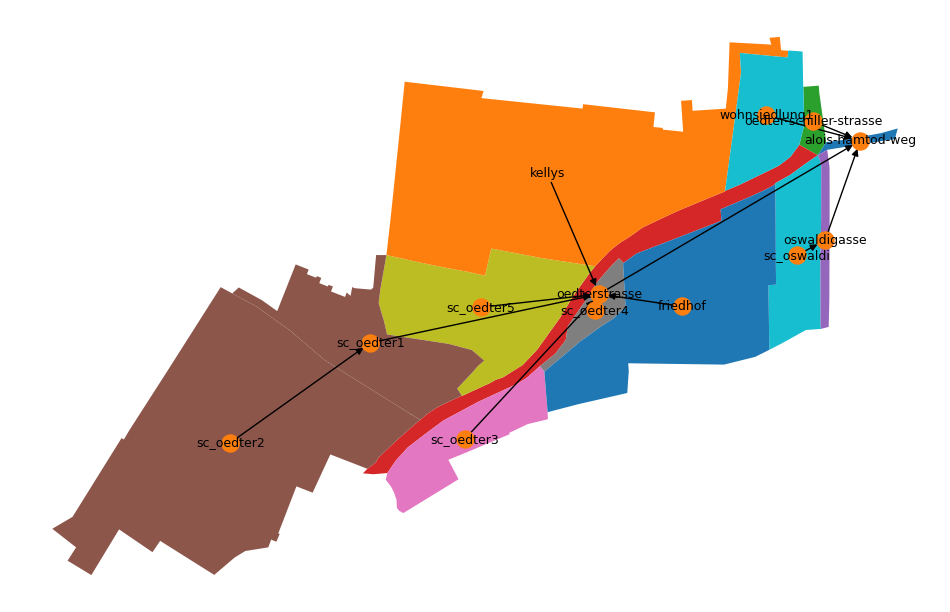

In [23]:
fig, ax = plt.subplots(figsize=[12,8])

pos = df_subcats.set_index("name")["center"].to_dict()
df_subcats.plot(column="name", ax=ax)
nx.draw(g, pos=pos, with_labels=True, ax=ax, arrows=True, font_size=9, node_color="tab:orange", node_size=150)

In [10]:
oedter_area = df_subcats.loc[df_subcats["name"]!="kellys", "area_ha"].sum()

storms_of_interest = df_storms.columns.values
durations = df_storms.index.values
oedter_area

7.58475366912084

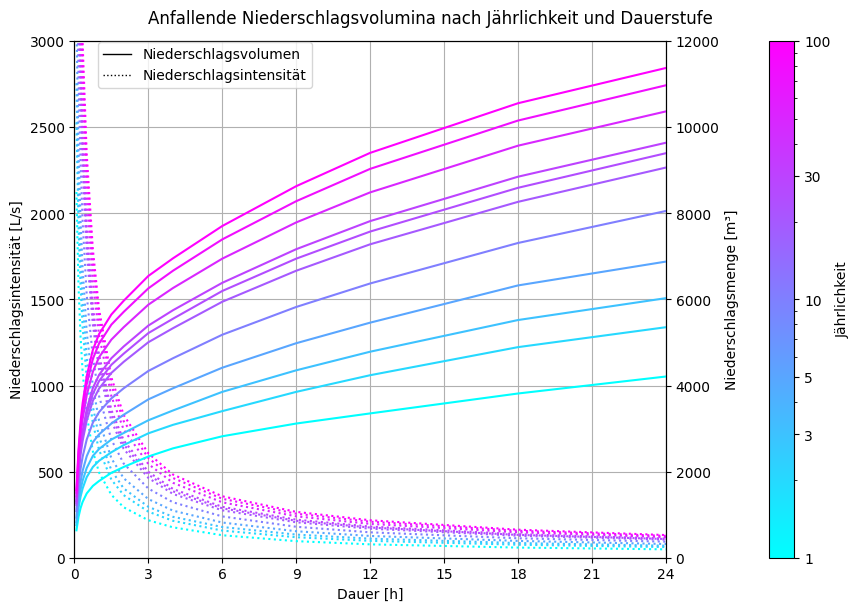

In [11]:
fig, ax1 = plt.subplots(constrained_layout=True, figsize=[8.5, 6])
ax2 = ax1.twinx()

fig.suptitle("Anfallende Niederschlagsvolumina nach Jährlichkeit und Dauerstufe")

sm = plt.cm.ScalarMappable(cmap=mpl.colormaps["cool"], norm=mpl.colors.LogNorm(vmin=1, vmax=100))

for i, return_period in enumerate(storms_of_interest):
    vr = (df_storms[return_period] * oedter_area * 10).values
    ax2.plot(durations, vr, color=mpl.colormaps["cool"](mpl.colors.LogNorm(vmin=1, vmax=100)(return_period)))
    q = vr / durations * 1000 / 60
    ax1.plot(durations, q, color=mpl.colormaps["cool"](mpl.colors.LogNorm(vmin=1, vmax=100)(return_period)), linestyle="dotted")

ax2.set(ylabel="Niederschlagsmenge [m³]", ylim=[0,12000],
        xlabel="Dauer [h]", xlim=[0, 1440], xticks=np.arange(0, 1620, 180)) #, xticks=[0, 60, 120, 360, 720, 1440, 2880, 7200], xticklabels=[0, "1h", "2h", "6h", "12h", "24h", "2d", "5d"])
ax2.xaxis.set_major_formatter(lambda x, pos: f"{x/60:.0f}")
ax1.set(ylabel="Niederschlagsintensität [L/s]", ylim=[0,80], yticks=[0.25*t for t in ax2.get_yticks()], xlabel="Dauer [h]")
formatter = mpl.ticker.LogFormatter(10, labelOnlyBase=False, minor_thresholds=(np.inf, np.inf))

fig.colorbar(sm, ax=ax2, ticks=[1, 3, 5, 10, 30, 100], format=formatter, label="Jährlichkeit")
custom_lines = [mpl.lines.Line2D([0], [0], color="black", lw=1),
                mpl.lines.Line2D([0], [0], color="black", lw=1, linestyle="dotted")]
fig.legend(custom_lines, ["Niederschlagsvolumen", "Niederschlagsintensität"], loc="upper left", bbox_to_anchor=(0.1,0.95))
ax1.grid(zorder=0)
odir = Path(r"Y:\PROJECTS\PeriSponge\07_Fallstudie\Feldbach\Detailanalyse\Modell-Check\02_subcats\plots")
odir.mkdir(parents=True, exist_ok=True)
fig.savefig(odir/"niederschlagsvolumina_oedter.png")

# Szenario L

In [13]:
retention = np.zeros(len(g.nodes))
retention=set_retention("kellys", 1400, g, retention=retention)
retention=set_retention("oedterstrasse", 1014, g, retention=retention)
retention=set_retention("wohnsiedlung1", 101, g, retention=retention)

subcat_of_interest = "alois-hamtod-weg"

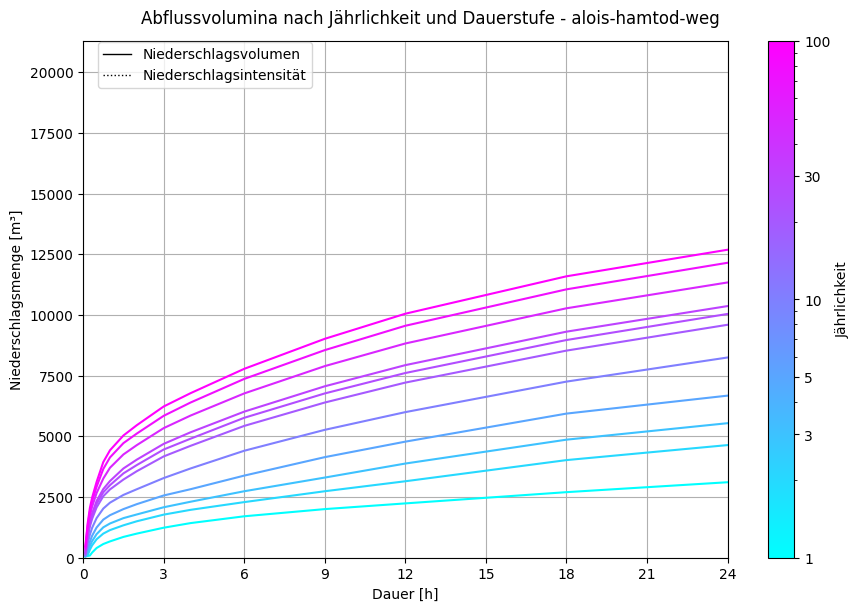

In [14]:
plot_vq(subcat_of_interest, df_storms, retention)

In [200]:
list(map(lambda p: calc_flow_dfs(g, p, retention=set_retention("oedter-schiller-strasse", 4, g))[7], df_storms.values.flatten()))

[847.1426782312354,
 1009.265093132423,
 1100.4589515143412,
 1242.3160645528806,
 1444.9690831793648,
 1637.4894508745256,
 1698.2853564624709,
 1759.081262050416,
 1900.9383750889558,
 2012.3975353335218,
 2093.458742784116,
 1262.5813664155287,
 1536.162941561283,
 1698.2853564624709,
 1900.9383750889558,
 2225.1832048913307,
 2569.6933365563546,
 2681.152496800921,
 2772.3463551828395,
 3015.529977534621,
 3218.182996161105,
 3360.0401091996455,
 1536.162941561283,
 1890.805724157631,
 2103.59139371544,
 2356.9076669985457,
 2752.081053320191,
 3197.917694298457,
 3339.7748073369958,
 3451.2339675815633,
 3775.4787973839375,
 4028.7950706670435,
 4221.315438362204,
 1728.6833092564439,
 2144.121997440737,
 2387.305619792519,
 2691.285147732245,
 3126.9891377791873,
 3623.4890334140746,
 3795.7440992465868,
 3917.335910422478,
 4292.243994881474,
 4575.9582209585515,
 4788.743890516361,
 1992.1322334708734,
 2498.7647800370846,
 2782.4790061141634,
 3147.2544396418352,
 3664.0196371